In [1]:
# Dependencies and Setup
import pandas as pd

# File to Load (Remember to Change These)
school_data_to_load = "Resources/schools_complete.csv"
student_data_to_load = "Resources/students_complete.csv"

# Read School and Student Data File and store into Pandas DataFrames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)

# Combine the data into a single dataset.  
school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])

In [2]:
school_data_complete.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635


# Data Preparation

In [3]:
# Cleanoing Data 
school_data_complete['grade'] = school_data_complete['grade'].map(lambda x: int(x.replace('th','')))
# Set new index to school_name and assign data to the new DataFrame: school_df
school_df = school_data_complete.set_index("school_name",drop=True)

In [4]:
global schools_list, grades_list
schools_list = school_data_complete.school_name.unique()
grades_list = sorted(school_data_complete.grade.unique())
tot_stud = len(school_data_complete.student_name.unique())

# District Summary

* Calculate the total budget
* Calculate the total number of schools
* Calculate the total number of students

* Calculate the average math score
* Calculate the average reading score
* Calculate the percentage of students with a passing math score (70 or greater)
* Calculate the percentage of students with a passing reading score (70 or greater)
* Calculate the percentage of students who passed math **and** reading (% Overall Passing)
* Create a dataframe to hold the above results
* Optional: give the displayed data cleaner formatting

In [5]:
def df_summary (df_sum, tot_case = False):
    """Summary Analysis of a DataFrame
    Args:
        df_sum (DataFrame): Given DataFrame
        tot_case (bool):    False for summary per single school
                            True for summary per set of  school
    Returns:
        sum_data (list): Analysis output values)
    """
    global tot_num, tot_budget, schools_number
    tot_num = len(df_sum)
    tot_budget = df_sum.budget.unique().sum()
    
    if tot_case == True:
        schools_number =len(schools_list)
        sc_type = "Charter/District"
    else: 
        sc_type = df_sum.type.all()
        schools_number = 1
        
    avg_math = df_sum.math_score.sum()/tot_num
    avg_read = df_sum.reading_score.sum()/tot_num
    st_pass_math = len(df_sum.math_score[df_sum.math_score>=70])
    st_pass_read = len(df_sum.reading_score[df_sum.reading_score>=70])
    st_pass_both = len(df_sum[(df_sum.math_score>=70)
                                                    & (df_sum.reading_score>=70)])
    st_pass_one = len(df_sum.loc[(df_sum.math_score>=70)
                                                    | (df_sum.reading_score>=70)])

    sum_data = [schools_number, sc_type, "{0:,}".format(tot_num), "${:,.2f}".format(tot_budget), 
                tot_budget/tot_num, avg_math, avg_read, st_pass_math/tot_num*100, 
                st_pass_read/tot_num*100, st_pass_both/tot_num*100, st_pass_one/tot_num*100]
    return sum_data

In [6]:
col_names = {"School Name": ["Number of Schools", "School Type", "Total Students", "Total School Budget",
            "Per Student Budget", "Average Math Score", "Average Read Score", "% Pass Math",
            "% Pass Reading", "% Overall Passing (Math&Read)", "% At Least One Test Pass"]}
distr_sum_df = pd.DataFrame.from_dict(col_names)
distr_sum_df["_City's School District"] = df_summary(school_data_complete, True)

In [7]:
border = "#"*135
print("\nDistrict Summary, Schools by Number of Students:\n{}\n".format(border))
pd.set_option('display.max_colwidth', 30)
pd.options.display.float_format = '{:,.2f}'.format

print(school_data_complete.school_name.value_counts())
print("\n{}\nTotal budget: ${:,}\nTotal number of schools:{}".format(border, tot_budget, schools_number))
print("Total number of students: by school records - {:,}, by unique name - {:,}\n{}".format(tot_num, tot_stud, border))
distr_sum_df.transpose()


District Summary, Schools by Number of Students:
#######################################################################################################################################

Bailey High School       4976
Johnson High School      4761
Hernandez High School    4635
Rodriguez High School    3999
Figueroa High School     2949
Huang High School        2917
Ford High School         2739
Wilson High School       2283
Cabrera High School      1858
Wright High School       1800
Shelton High School      1761
Thomas High School       1635
Griffin High School      1468
Pena High School          962
Holden High School        427
Name: school_name, dtype: int64

#######################################################################################################################################
Total budget: $24,649,428
Total number of schools:15
Total number of students: by school records - 39,170, by unique name - 32,715
###############################################################

,0,1,2,3,4,5,6,7,8,9,10
School Name,Number of Schools,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Read Score,% Pass Math,% Pass Reading,% Overall Passing (Math&Read),% At Least One Test Pass
_City's School District,15,Charter/District,"39,170","$24,649,428.00",629.29,78.99,81.88,74.98,85.81,65.17,95.61


## School Summary

* Create an overview table that summarizes key metrics about each school, including:
  * School Name
  * School Type
  * Total Students
  * Total School Budget
  * Per Student Budget
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * % Overall Passing (The percentage of students that passed math **and** reading.)
  
* Create a dataframe to hold the above results

In [8]:
# Set new index to school_name and assign data to the new DataFrame: school_df
school_df = school_data_complete.set_index("school_name",drop=True)

In [9]:
#
for i in range(len(schools_list)):
 distr_sum_df.insert(i+1,schools_list[i], df_summary(school_df.loc[school_df.index == schools_list[i], :]))
transpose_df = distr_sum_df.transpose()
transpose_df.columns = transpose_df.iloc[0]
final_sum_df = transpose_df[1:]
final_sum_df.sort_index(ascending = True)

School Name,Number of Schools,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Read Score,% Pass Math,% Pass Reading,% Overall Passing (Math&Read),% At Least One Test Pass
Bailey High School,1,District,"4,976","$3,124,928.00",628.00,77.05,81.03,66.68,81.93,54.64,93.97
Cabrera High School,1,Charter,"1,858","$1,081,356.00",582.00,83.06,83.98,94.13,97.04,91.33,99.84
Figueroa High School,1,District,"2,949","$1,884,411.00",639.00,76.71,81.16,65.99,80.74,53.20,93.52
Ford High School,1,District,"2,739","$1,763,916.00",644.00,77.10,80.75,68.31,79.30,54.29,93.32
Griffin High School,1,Charter,"1,468","$917,500.00",625.00,83.35,83.82,93.39,97.14,90.60,99.93
Hernandez High School,1,District,"4,635","$3,022,020.00",652.00,77.29,80.93,66.75,80.86,53.53,94.09
Holden High School,1,Charter,427,"$248,087.00",581.00,83.80,83.81,92.51,96.25,89.23,99.53
Huang High School,1,District,"2,917","$1,910,635.00",655.00,76.63,81.18,65.68,81.32,53.51,93.49
Johnson High School,1,District,"4,761","$3,094,650.00",650.00,77.07,80.97,66.06,81.22,53.54,93.74
Pena High School,1,Charter,962,"$585,858.00",609.00,83.84,84.04,94.59,95.95,90.54,100.00


## Top Performing Schools (By % Overall Passing)

* Sort and display the top five performing schools by % overall passing.

In [10]:
final_sum_df.sort_values('% Overall Passing (Math&Read)', ascending = False).head()

School Name,Number of Schools,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Read Score,% Pass Math,% Pass Reading,% Overall Passing (Math&Read),% At Least One Test Pass
Cabrera High School,1,Charter,"1,858","$1,081,356.00",582.00,83.06,83.98,94.13,97.04,91.33,99.84
Thomas High School,1,Charter,"1,635","$1,043,130.00",638.00,83.42,83.85,93.27,97.31,90.95,99.63
Griffin High School,1,Charter,"1,468","$917,500.00",625.00,83.35,83.82,93.39,97.14,90.60,99.93
Wilson High School,1,Charter,"2,283","$1,319,574.00",578.00,83.27,83.99,93.87,96.54,90.58,99.82
Pena High School,1,Charter,962,"$585,858.00",609.00,83.84,84.04,94.59,95.95,90.54,100.00


## Bottom Performing Schools (By % Overall Passing)

* Sort and display the five worst-performing schools by % overall passing.

In [11]:
final_sum_df.sort_values('% Overall Passing (Math&Read)', ascending = True).head()

School Name,Number of Schools,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Read Score,% Pass Math,% Pass Reading,% Overall Passing (Math&Read),% At Least One Test Pass
Rodriguez High School,1,District,"3,999","$2,547,363.00",637.00,76.84,80.74,66.37,80.22,52.99,93.60
Figueroa High School,1,District,"2,949","$1,884,411.00",639.00,76.71,81.16,65.99,80.74,53.20,93.52
Huang High School,1,District,"2,917","$1,910,635.00",655.00,76.63,81.18,65.68,81.32,53.51,93.49
Hernandez High School,1,District,"4,635","$3,022,020.00",652.00,77.29,80.93,66.75,80.86,53.53,94.09
Johnson High School,1,District,"4,761","$3,094,650.00",650.00,77.07,80.97,66.06,81.22,53.54,93.74


## Math Scores by Grade

* Create a table that lists the average Reading Score for students of each grade level (9th, 10th, 11th, 12th) at each school.

  * Create a pandas series for each grade. Hint: use a conditional statement.
  
  * Group each series by school
  
  * Combine the series into a dataframe
  
  * Optional: give the displayed data cleaner formatting

In [12]:
def grades_summary (df_grades, score):
    """Summary Analysis of a DataFrame over Grade Score
    Args:
        df_grades (DataFrame): Given DataFrame
        score (str):    Type of score for analysis
    Returns:
        df (DataFrame): Analysis output
    """
    df = pd.DataFrame()
    mean_list =[]
    for i in range(len(schools_list)):
        for j in range(len(grades_list)):
            group_df = df_grades.loc[school_df["grade"]==grades_list[j]]
            mean_list.append(group_df.loc[group_df.index == schools_list[i],:][score].mean())
        df.insert(i, schools_list[i], mean_list)
        mean_list=[]
    df.insert(i+1, "School Name", grades_list)
    df = df.set_index("School Name").transpose().add_suffix("th")
    return df

In [13]:
grades_summary(school_df, 'math_score').sort_index()

School Name,9th,10th,11th,12th
Bailey High School,77.08,77.00,77.52,76.49
Cabrera High School,83.09,83.15,82.77,83.28
Figueroa High School,76.40,76.54,76.88,77.15
Ford High School,77.36,77.67,76.92,76.18
Griffin High School,82.04,84.23,83.84,83.36
Hernandez High School,77.44,77.34,77.14,77.19
Holden High School,83.79,83.43,85.00,82.86
Huang High School,77.03,75.91,76.45,77.23
Johnson High School,77.19,76.69,77.49,76.86
Pena High School,83.63,83.37,84.33,84.12


## Reading Score by Grade 

* Perform the same operations as above for reading scores

In [14]:
grades_summary(school_df, 'reading_score').sort_index()

School Name,9th,10th,11th,12th
Bailey High School,81.30,80.91,80.95,80.91
Cabrera High School,83.68,84.25,83.79,84.29
Figueroa High School,81.20,81.41,80.64,81.38
Ford High School,80.63,81.26,80.40,80.66
Griffin High School,83.37,83.71,84.29,84.01
Hernandez High School,80.87,80.66,81.40,80.86
Holden High School,83.68,83.32,83.82,84.70
Huang High School,81.29,81.51,81.42,80.31
Johnson High School,81.26,80.77,80.62,81.23
Pena High School,83.81,83.61,84.34,84.59


## Scores by School Spending

* Create a table that breaks down school performances based on average Spending Ranges (Per Student). Use 4 reasonable bins to group school spending. Include in the table each of the following:
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * Overall Passing Rate (Average of the above two)

In [32]:
final_df = final_sum_df.drop("_City's School District", axis=0).sort_index()
budget_df = final_df.loc[:,['Per Student Budget', 'Average Math Score', 'Average Read Score',
                                '% Pass Math', '% Pass Reading', '% Overall Passing (Math&Read)']]
bins = [0, 584, 629, 644, 675]
group_names = ["<584", "585-629", "630-644", "645-675"]
budget_df["Spending Ranges"] = pd.cut(budget_df["Per Student Budget"], bins, right = True, labels=group_names)
budget_df = budget_df.groupby("Spending Ranges").max()
del budget_df['Per Student Budget']
budget_df

School Name,Average Math Score,Average Read Score,% Pass Math,% Pass Reading,% Overall Passing (Math&Read)
Spending Ranges,,,,,
<584,83.80,83.99,94.13,97.04,91.33
585-629,83.84,84.04,94.59,97.14,90.60
630-644,83.42,83.85,93.27,97.31,90.95
645-675,77.29,81.18,66.75,81.32,53.54


## Scores by School Size

* Perform the same operations as above, based on school size.

In [18]:
def pass70(x):
    return x[x>=70].count()/len(x)*100
scores_size = school_data_complete.groupby(['size'])[['math_score','reading_score']].agg(['mean', pass70])
scores_size['% Overal pass'] = final_df['% Overall Passing (Math&Read)'].values
scores_size = scores_size.reset_index()

In [19]:
bins = [0, 1000, 2000, 5000]
group_names = ["<1000", "1000-2000", "2000-5000"]
scores_size["School Size"] = pd.cut(scores_size['size'], bins, right = True, labels=group_names, include_lowest=True)
scores_size = scores_size.groupby("School Size").max()
scores_size

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


size math_score        reading_score        % Overal pass
                        mean pass70          mean pass70              
School Size                                                           
<1000         962      83.84  94.59         84.04  96.25         91.33
1000-2000    1858      83.68  94.13         83.98  97.31         90.60
2000-5000    4976      83.27  93.87         83.99  96.54         90.95

## Scores by School Type

* Perform the same operations as above, based on school type

In [21]:
scores_type = school_data_complete.groupby(['type'])[['math_score','reading_score']].agg(['mean', pass70])
# scores_type['% Overal pass'] = final_df['% Overall Passing (Math&Read)'].values
scores_type

math_score        reading_score       
               mean pass70          mean pass70
type                                           
Charter       83.41  93.70         83.90  96.65
District      76.99  66.52         80.96  80.91

# Trends in School Performance

* Scores Distribution (Math vs Reading)
* Overall Passing (Both Test vs At Least One)


Trend 1: Overall performance in reding is better over math



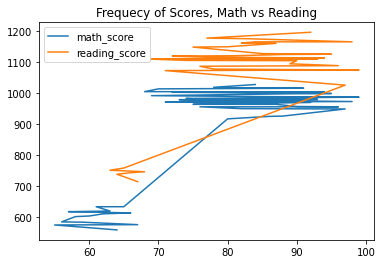

In [22]:
math = school_df['math_score'].value_counts()
read = school_df['reading_score'].value_counts()
math.plot(kind='line', title="Frequecy of Scores, Math vs Reading", legend = True)
read.plot(kind='line', legend = True)
print("\nTrend 1: Overall performance in reding is better over math\n")


Trend 2:
Overall performance in passing at least one test is
better over passing both tests


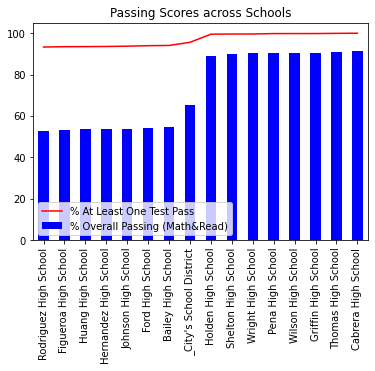

In [23]:
both_tests_pass = final_sum_df['% Overall Passing (Math&Read)'].sort_values()
one_test_pass = final_sum_df['% At Least One Test Pass'].sort_values()
one_test_pass.plot(kind = 'line', title="Passing Scores across Schools", stacked = True, colormap = 'flag', legend = True, rot=90)
both_tests_pass.plot(kind = 'bar', stacked = True, colormap = 'winter', legend = True, rot=90)
print("\nTrend 2:\nOverall performance in passing at least one test is\nbetter over passing both tests")

In [ ]:
final_sum_df.head()